In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

import sys

sys.path += ['../']

from src.utils_network import generate_network
from src.utils_model import initialize_model
from src.simulate import update_opinions, rmsd_from_truth, score_opinion_updates

In [2]:
RNG = np.random.RandomState(42)

In [3]:
N = 1000
frac_experts = 0.1

Ne = int(N * frac_experts)
Na = N - Ne
print(N, frac_experts, Ne, Na)

1000 0.1 100 900


(array([  2.,  28.,  92., 186., 253., 221., 137.,  51.,  25.,   5.]),
 array([ 1.,  3.,  5.,  7.,  9., 11., 13., 15., 17., 19., 21.]),
 <BarContainer object of 10 artists>)

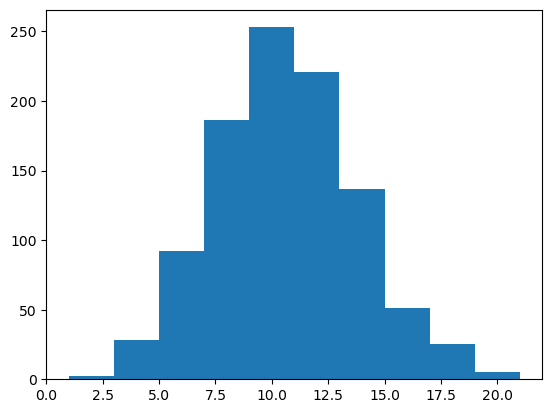

In [4]:
# generate syntetic network

network_dict = {'network_model' : 'ER', 'average_degree' : 10}

A = generate_network(N, Ne, network_dict, seed=RNG)

# plot deg distrib
degrees = A.sum(axis=1)

plt.hist(degrees)

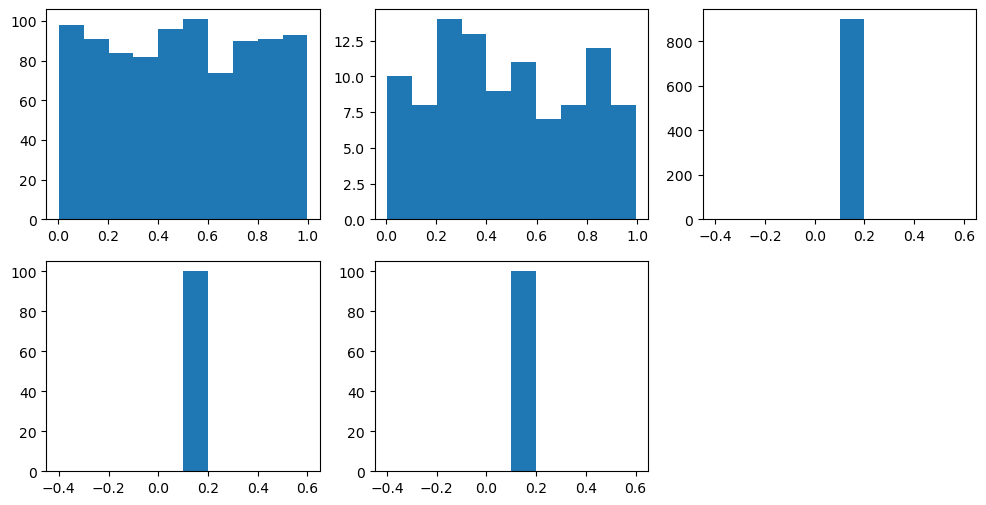

In [5]:
# initialize opinions and confidences
model_param_dict = {
    'init_opinions' : {'distrib' : 'uniform'},
    'init_confidence' : {'distrib' : 'const', 'confidence' : 0.1},
    'init_alpha_experts' : {'distrib' : 'const', 'alpha' : 0.1}
}

Xa, Xe, eps_a, eps_e, alpha_e = initialize_model(Na, Ne, model_param_dict, seed=RNG)

plt.figure(figsize=(12,6))
for n, arr in enumerate([Xa, Xe, eps_a, eps_e, alpha_e], 1):
    
    plt.subplot(2, 3, n)
    plt.hist(arr)

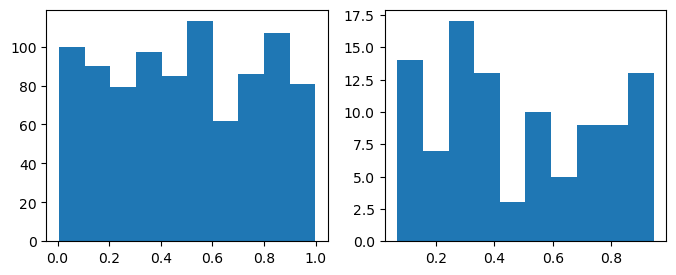

In [6]:
# update opinions
tau = 0.9

Xa_new, Xe_new = update_opinions(Xa, Xe, eps_a, eps_e, alpha_e, tau, A)

plt.figure(figsize=(8,3))
for n, arr in enumerate([Xa_new, Xe_new], 1):
    
    plt.subplot(1, 2, n)
    plt.hist(arr)

### Try simulation

In [7]:
# set input params
N = 1000
frac_experts = 0.1

Ne = int(N * frac_experts)
Na = N - Ne

# generate syntetic network
network_dict = {'network_model' : 'ER', 'average_degree' : 20}
A = generate_network(N, Ne, network_dict, seed=RNG)

# initialize opinions and confidences
model_param_dict = {
    'init_opinions' : {'distrib' : 'uniform'},
    'init_confidence' : {'distrib' : 'const', 'confidence' : 0.3},
    'init_alpha_experts' : {'distrib' : 'const', 'alpha' : 0.2}
}
Xa, Xe, eps_a, eps_e, alpha_e = initialize_model(Na, Ne, model_param_dict, seed=RNG)

In [8]:
MAX_STEPS = 300
CONVERGENCE_THRESHOLD = 1e-3
opinions = [np.hstack([Xa, Xe]).tolist()]
rmsd_truth_a = []
rmsd_truth_e = []
rmsd_truth_all = []
for n_iter in tqdm(range(MAX_STEPS), total=MAX_STEPS):
    
    # update opinions
    Xa_new, Xe_new = update_opinions(Xa, Xe, eps_a, eps_e, alpha_e, tau, A)
    
    opinions.append(np.hstack([Xa_new, Xe_new]).tolist())
    
    rmsd_truth_a.append(rmsd_from_truth(Xa_new, tau))
    rmsd_truth_e.append(rmsd_from_truth(Xe_new, tau))
    rmsd_truth_all.append(rmsd_from_truth(np.hstack([Xa_new, Xe_new]), tau))
    
    is_converged = score_opinion_updates(np.hstack([Xa, Xe]), 
                                         np.hstack([Xa_new, Xe_new]), 
                                         conv_threshold=CONVERGENCE_THRESHOLD)
    
    if is_converged:
        break

    Xa = Xa_new
    Xe = Xe_new

  0%|          | 0/300 [00:00<?, ?it/s]

In [9]:
opinions = np.array(opinions)
rmsd_truth_a = np.array(rmsd_truth_a)
rmsd_truth_e = np.array(rmsd_truth_e)
rmsd_truth_all = np.array(rmsd_truth_all)

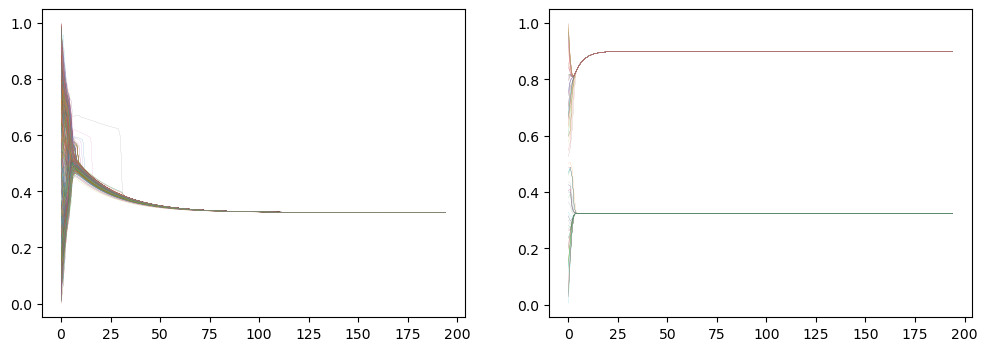

In [10]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
for n_ in range(Na):
    plt.plot(opinions[:, n_], lw=0.1)
    
plt.subplot(1,2,2)
for n_ in range(Na, N):
    plt.plot(opinions[:, n_], lw=0.1)

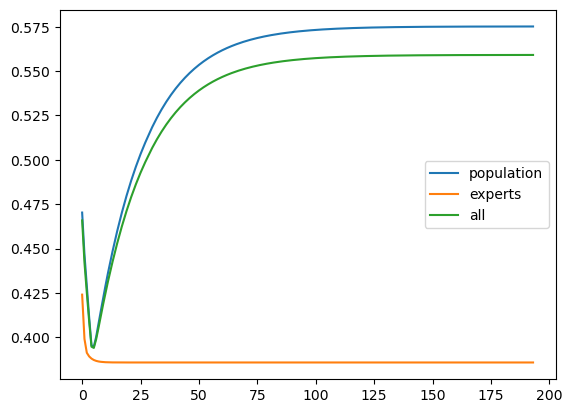

In [11]:
for rmsd, label in zip([rmsd_truth_a, rmsd_truth_e, rmsd_truth_all], ['population', 'experts', 'all']):
    plt.plot(rmsd, label=label)
    
plt.legend()

In [12]:
import json

In [13]:
with open("../results/experiment_only_experts_ER.json", 'rt') as rr:
    for line in rr:
        pass

In [14]:
line = json.loads(line)

In [49]:
import pandas as pd

In [85]:
ress = pd.read_json("../results/experiment_only_experts_ER.json", orient='records', lines=True)

In [86]:
ress.groupby(['network_params', 'init_opinions_params', 'init_confidence_params',
       'init_alpha_experts_params', 'tau', 'N', 'frac_experts']).apply(lambda rows: rows.shape[0])

network_params  init_opinions_params  init_confidence_params  init_alpha_experts_params  tau   N    frac_experts
ER_10           uniform               const_0.05              const_0.05                 0.00  50   1               5
                                                                                               100  1               5
                                                                                               200  1               5
                                                                                         0.10  50   1               5
                                                                                               100  1               5
                                                                                               200  1               5
                                                                                         0.25  50   1               5
                                                             

In [87]:
ress.seed.value_counts().sort_index()

42    1
43    1
44    1
45    1
46    1
47    1
48    1
49    1
50    1
51    1
52    1
53    1
54    1
55    1
56    1
57    1
58    1
59    1
60    1
61    1
62    1
63    1
64    1
65    1
66    1
67    1
68    1
69    1
70    1
71    1
72    1
73    1
74    1
75    1
76    1
77    1
78    1
79    1
80    1
81    1
82    1
83    1
84    1
85    1
86    1
87    1
88    1
89    1
90    1
91    1
Name: seed, dtype: int64

In [88]:
ress.n_simul.value_counts()

1    10
0    10
2    10
3    10
4    10
Name: n_simul, dtype: int64